## Question 1: 

### Part 1:

A: The total time across all mice is 88.46 hours. The script records the time by mouse also.

B: The AVG_Amp data has a standard deviation that varies by mouse, but the average STD of AVG_Amp is 4.79
    
### Part 2:

A: The animal with the highest average amp is mouse 'PL' 

B: The state with the most consistent movement frequency was Non-REM Sleep at (0.88 Hz) 
    
### Part 3: 
    
A: I would measure which state has the most dispersed data by either looking for the highest STD or by looking at which box plot(since I have those) is the widest. The most dispersed data is in the 'WAKE' state. The scatterplots also support this. 
 
B: I believe that frequency is more useful for distinguishing states than amplitude. The variance of amplitude across the plots is significantly greater than the variance of frequency. This makes frequency more reliable and therefore better. As supported by plots 1, 2, and 3. 

C: The data collected would be significantly more useful for distinguishing sleep states than mice. This is because the sleep state data is much more consistent than the mouse data, in which subjects AAR and PR can be seen to be wildly different but both pairs AAL & AAR and PL & PR are relatively similar. As supported by graphs 4 and 5. 


## Question 2: 

These answers are based on one particular iteration I ran. It can do as many as you tell it. Within reason.

A: 
- The mean is 0.52
- The Standard Deviation is 0.15
- The range is 0.5
- The median is 0.5
        
B: Done

C: Done 

In [6]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# This takes a file and reads its CSV to extract the data so that the script can work with it
# It is really simple
def read_csv_file(file_path):

    # Tries to read file and reports errors
    try:
        data = pd.read_csv(file_path)
        print(f"CSV file '{file_path}' successfully loaded.")
        return data
    
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None

In [8]:
# This function analyzes the data from the coin flip portion
def coin_analyzer(data, repetitions):
    
    # I put this in because for some reason you guys gave us only the SECOND column filled
    # It made this unnecessarily annoying
    if data.shape[1] > 1:
        data = data.iloc[:, [1]]
    else:
        print("The data set has somehow morphed. I don't know what happened. Pain")
        return
    
    # Below is where the coin rows are grabbed and sampled for values
    # it also has a check for how many times you want it to repeat
    
    # This is for when you want me to run it more than once
    if repetitions >= 1:
        for i in range(repetitions):
            print(f'\nIteration {i + 1}: ')
            
            # Grabbing ten random rows
            random_rows = data.sample(n=10, random_state=np.random.randint(0, 489))
            random_values = random_rows.iloc[:,0]
        
            # Finding the things we actually want
            mean = random_values.mean()
            std_dev = random_values.std()
            data_range = np.max(random_values) - np.min(random_values)
            median = random_values.median()

            print('Rows Chosen: ')
            print(random_rows)
            print('\nStatistics:')
            print(f'\nMean: {np.round(mean, 2)}')
            print(f'\nStandard Deviation: {np.round(std_dev, 2)}')
            print(f'\nRange: {np.round(data_range, 2)}')
            print(f'\nMedian: {np.round(median, 2)}')
    
    # Same as above but only once
    elif repetitions == 1:
        print(f'\nSince we only chose one set, here is the processed information: ')        
            # Grabbing ten random rows
        random_rows = data.sample(n=10, random_state=np.random.randint(0, 489))
        random_values = random_rows.iloc[:,0]
    
        # Finding the things we actually want
        mean = random_values.mean()
        std_dev = random_values.std()
        data_range = np.max(random_values) - np.min(random_values)
        median = random_values.median()

        print('Rows Chosen: ')
        print(random_rows)
        print('\nStatistics:')
        print(f'Mean: {np.round(mean, 2)}')
        print(f'Standard Deviation: {np.round(std_dev, 2)}')
        print(f'Range: {np.round(data_range, 2)}')
        print(f'Median: {np.round(median, 2)}')
    
    # If for some ungodly reason you decide to throw 0 or a negative in there
    # This will completely ignore you
    else: 
        print(':|')
        pass

In [9]:
# This is the function responsible for analyzing the Sleep data
# I Basically just grouped the mice by mouse and then sorted
def sleep_analyzer(data):
    print('\nSleep Data Analysis:')
    
    # Sorts the data into groups by mouse
    grouped_data = data.groupby('Animal_ID')
    
    # Initialize variables to track results
    total_time_by_mouse = {}
    std_dev_avg_amp_by_mouse = {}
    highest_avg_amp_mouse = None
    highest_avg_amp_value = -float('inf')
    std_dev_freq_by_state = {}
    lowest_std_dev_freq_state = None
    lowest_std_dev_freq_value = float('inf')
    complete_overall_time = []
    
    
    # Iterate through each mouse group
    for mouse_id, group in grouped_data:
        print(f'\nSummary for Mouse "{mouse_id}":')
        
        # Total length of time covered by measurements (sum of all epochs)
        total_time = group['Epoch'].sum()
        total_time_by_mouse[mouse_id] = total_time
        complete_overall_time.append(total_time)
        print(f'Total Time Covered: {total_time} seconds')   

        # Standard deviation of the average amplitude (AVG_Amp)
        std_dev_avg_amp = group['AVG_Amp'].std()
        std_dev_avg_amp_by_mouse[mouse_id] = std_dev_avg_amp
        print(f'Standard Deviation of Average Amplitude: {np.round(std_dev_avg_amp, 2)}')
        
        # Check if this mouse has the highest average amplitude
        avg_amp = group['AVG_Amp'].mean()
        if avg_amp > highest_avg_amp_value:
            highest_avg_amp_value = avg_amp
            highest_avg_amp_mouse = mouse_id
    
    # Group data by Sleep state to calculate stats
    grouped_by_state = data.groupby('Sleep_State')
    
    # Iterate through sleep states
    for state, group in grouped_by_state:
        
        # Standard deviation of movement frequency 
        std_dev_freq = group['AVG_Freq'].std()
        std_dev_freq_by_state[state] = std_dev_freq
        
        # Check if this state has the lowest standard deviation of movement frequency
        if std_dev_freq < lowest_std_dev_freq_value:
            lowest_std_dev_freq_value = std_dev_freq
            lowest_std_dev_freq_state = state
    
    # Find overall sum of time in hours
    time_final = np.sum(complete_overall_time) * (1/10) * (1/60) * (1/60) 
    time_final = np.round(time_final, 2)
    
    
    # Print results
    print('\nOverall Results:')
    print(f'Mouse with the highest average amplitude: {highest_avg_amp_mouse} ({np.round(highest_avg_amp_value, 2)} Volts)')
    print(f'Sleep state with the lowest standard deviation of movement frequency: {lowest_std_dev_freq_state} ({np.round(lowest_std_dev_freq_value, 2)} Hz)')
    
    # Print total time by mouse
    print('\nTotal Time Covered by Each Mouse:')
    for mouse_id, total_time in total_time_by_mouse.items():
        print(f'Mouse {mouse_id}: {total_time} seconds')
    print(f'The overall time covered by all mice is {time_final} hours.')
    
    # Print standard deviations by mouse
    print('\nStandard Deviation of Average Amplitude by Each Mouse:')
    for mouse_id, std_dev in std_dev_avg_amp_by_mouse.items():
        print(f'Mouse {mouse_id}: {np.round(std_dev, 2)}')
    
    # Print standad deviation of movement frequency 
    print('\nStandard Deviation of Movement Frequency by Sleep State:')
    for state, std_dev in std_dev_freq_by_state.items():
        print(f'{state}: {np.round(std_dev, 2)} Hz')
        
    # Graphing portion
    print('\nGenerating visualization:')
    
    # Box plot for dispersion of data by sleep state
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Sleep_State', y='AVG_Freq', data=data)
    plt.title('Dispersion of movement Frequency by Sleep State')
    plt.xlabel('Sleep State')
    plt.ylabel('Movement Frequency (Hz)')
    plt.show()
    
    # Scatter plot for amp and freq by state
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='AVG_Amp', y='AVG_Freq', hue='Sleep_State', data=data)
    plt.title('Amp vs Freq by Sleep State')
    plt.xlabel('Average Amplitude (Volts)')
    plt.ylabel('Movement Frequency (Hz)')
    plt.legend(title='Sleep State')
    plt.show()

    # Box plots for individual Mice by Sleep State
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Animal_ID', y='AVG_Amp', data=data)
    plt.title('Distribution of Amplitude by Mouse')
    plt.xlabel('Mouse ID')
    plt.ylabel('Average Amplitude (Volts)')
    plt.show
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Sleep_State', y='AVG_Amp', data=data)
    plt.title("Distribution of Amplitude by Sleep State")
    plt.xlabel("Sleep State")
    plt.ylabel("Average Amplitude (Volts)")
    plt.show()
    
    # Scatter plot for distinguishing mice vs sleep states
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='AVG_Amp', y='AVG_Freq', hue='Animal_ID', data=data, s=100)
    plt.title("Amplitude vs Frequency by Mouse")
    plt.xlabel("Average Amplitude (Volts)")
    plt.ylabel("Average Frequency (Hz)")
    plt.legend(title="Mouse ID")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='AVG_Amp', y='AVG_Freq', hue='Sleep_State', data=data, palette='tab20', s=100)
    plt.title("Amplitude vs Frequency by Sleep State")
    plt.xlabel("Average Amplitude (Volts)")
    plt.ylabel("Average Frequency (Hz)")
    plt.legend(title="Sleep State")
    plt.show()


CSV file 'SleepscoreData.csv' successfully loaded.
CSV file 'CoinFlipData.csv' successfully loaded.

Iteration 1: 
Rows Chosen: 
     0.8
314  0.5
213  0.8
309  0.7
435  0.4
117  0.6
259  0.4
221  0.9
180  0.3
39   0.5
227  0.2

Statistics:

Mean: 0.53

Standard Deviation: 0.22

Range: 0.7

Median: 0.5

Iteration 2: 
Rows Chosen: 
     0.8
49   0.5
73   0.6
236  0.4
178  0.5
34   0.5
450  0.5
177  0.8
464  0.1
380  0.3
76   0.8

Statistics:

Mean: 0.5

Standard Deviation: 0.21

Range: 0.7

Median: 0.5

Iteration 3: 
Rows Chosen: 
     0.8
77   0.6
323  0.5
100  0.5
148  0.8
10   0.7
361  0.7
392  0.3
359  0.4
287  0.4
115  0.3

Statistics:

Mean: 0.52

Standard Deviation: 0.18

Range: 0.5

Median: 0.5

Iteration 4: 
Rows Chosen: 
     0.8
385  0.4
424  0.3
205  0.4
437  0.4
367  0.4
4    0.7
356  0.4
152  0.3
463  0.4
199  0.7

Statistics:

Mean: 0.44

Standard Deviation: 0.14

Range: 0.4

Median: 0.4

Iteration 5: 
Rows Chosen: 
     0.8
87   0.7
370  0.3
385  0.4
468  0.4
226  0.3
85

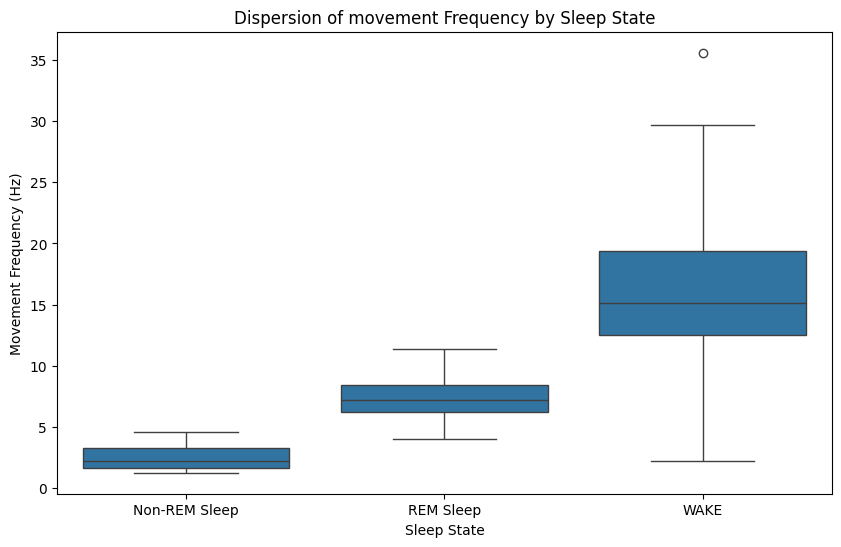

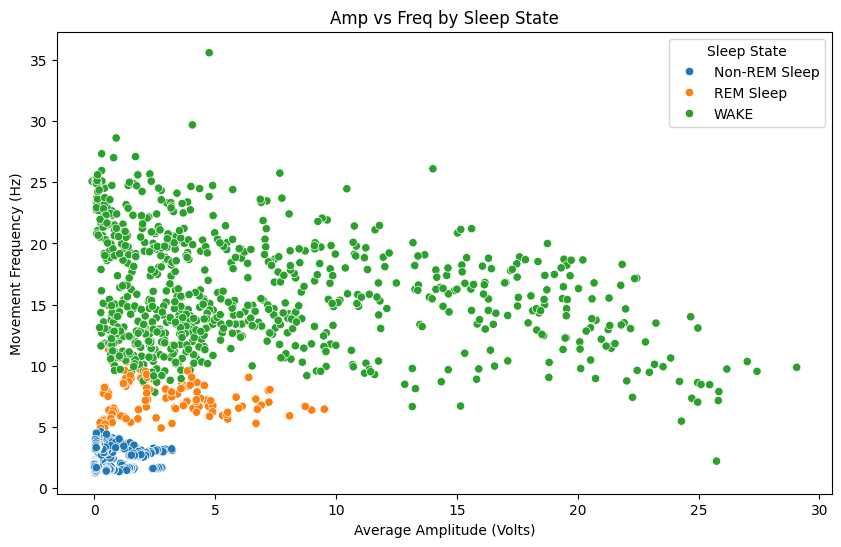

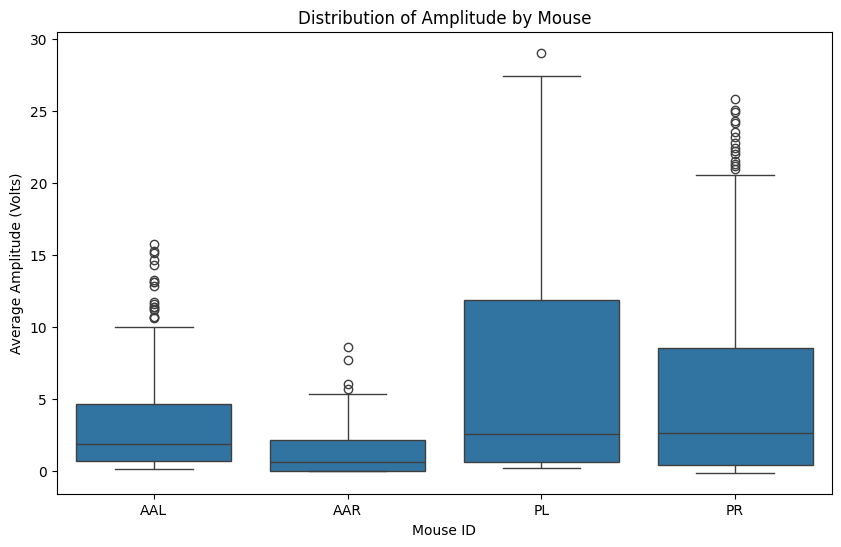

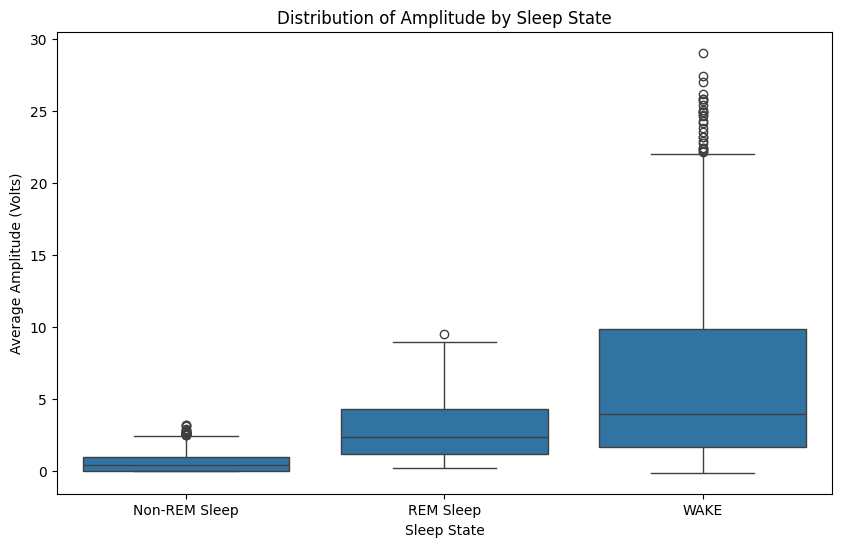

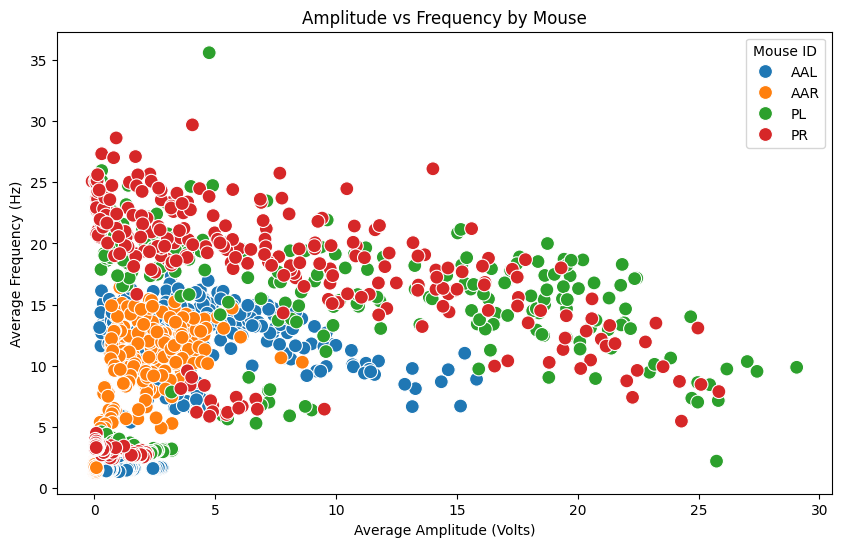

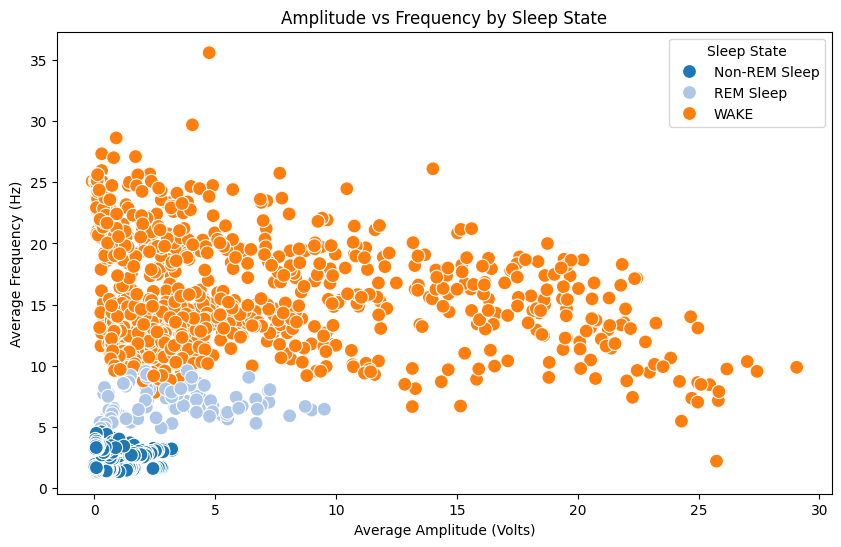

In [10]:
# This is where the script is actually run
if __name__ == "__main__":
    # Gets the directory of the script
    script_dir = os.path.dirname('__file__')
    
    # Establishes the file paths for the CSV files
    sleep_data_file = os.path.join(script_dir, 'SleepscoreData.csv')
    coin_flip_data = os.path.join(script_dir, 'CoinFlipData.csv')
    
    # Reads the CSV files
    sleep_data = read_csv_file(sleep_data_file)
    coin_flip_data = read_csv_file(coin_flip_data)
   
   # Runs the data functions
    if coin_flip_data is not None:
        variable_name_1_because_i_am_creative = int(input('How many times do you want to run the coin? '))
        coin_analyzer(coin_flip_data, variable_name_1_because_i_am_creative)
        # print('Coin Data acquired')

    if sleep_data is not None:
        sleep_analyzer(sleep_data)
        #print('Sleep Data Acquired')